In [88]:
# import dependencies
import pandas as pd
import seaborn as sns

In [103]:
# read in dataset
data = pd.read_excel('dataset/police_complaints.xlsx')
data

,complaint_id,officer_id,date_received,precinct,complaint_type,resolution,complainant_race,complainant_gender,complainant_age,use_of_force_involved
0,CMP0001,OFF0041,2024-06-08,North,Excessive Force,Unfounded,White,Male,26,True
1,CMP0002,OFF0044,2024-09-15,Central,Excessive Force,Exonerated,Black,Male,23,True
2,CMP0003,OFF0015,2023-10-14,Central,Excessive Force,Sustained,Other,Female,32,False
3,CMP0004,OFF0038,2023-07-27,East,Excessive Force,Sustained,Asian,Female,35,True
4,CMP0005,OFF0014,2025-01-04,East,Excessive Force,Pending,Asian,Male,40,False
...,...,...,...,...,...,...,...,...,...,...
95,CMP0096,OFF0007,2025-02-20,South,Neglect of Duty,Sustained,Hispanic,Male,37,True
96,CMP0097,OFF0046,2024-06-13,Central,Verbal Abuse,Unfounded,Black,Male,53,False
97,CMP0098,OFF0045,2024-08-17,South,Racial Profiling,Pending,Black,Non-binary,36,False
98,CMP0099,OFF0031,2023-09-27,West,Neglect of Duty,Sustained,Black,Female,48,True


In [138]:
data[data['use_of_force_involved'] == True]['complaint_id'].count()
data[data['resolution'] == 'Pending']['complaint_id'].count()

24

In [3]:
# How many complaints are on record?
print(f"There are {len(data.complaint_id)} complaints on record.")

There are 100 complaints on record.


In [4]:
# How many officers have complaints?
print(f"There are {len(data.officer_id.unique())} officers with complaints on record.")

There are 41 officers with complaints on record.


In [5]:
# List of officers with complaints
officers = data.officer_id.unique()
for o in officers:
    print(f"Officer ID: {o}")
    officer_data = data[data.officer_id == o]
    print(f"Number of complaints: {len(officer_data)}")
    print(f"Complaint IDs: {officer_data.complaint_id.tolist()}")
    print()

Officer ID: OFF0041
Number of complaints: 4
Complaint IDs: ['CMP0001', 'CMP0009', 'CMP0011', 'CMP0019']

Officer ID: OFF0044
Number of complaints: 4
Complaint IDs: ['CMP0002', 'CMP0016', 'CMP0029', 'CMP0059']

Officer ID: OFF0015
Number of complaints: 3
Complaint IDs: ['CMP0003', 'CMP0052', 'CMP0094']

Officer ID: OFF0038
Number of complaints: 3
Complaint IDs: ['CMP0004', 'CMP0025', 'CMP0035']

Officer ID: OFF0014
Number of complaints: 3
Complaint IDs: ['CMP0005', 'CMP0044', 'CMP0060']

Officer ID: OFF0039
Number of complaints: 3
Complaint IDs: ['CMP0006', 'CMP0020', 'CMP0037']

Officer ID: OFF0036
Number of complaints: 2
Complaint IDs: ['CMP0007', 'CMP0017']

Officer ID: OFF0050
Number of complaints: 4
Complaint IDs: ['CMP0008', 'CMP0049', 'CMP0053', 'CMP0081']

Officer ID: OFF0045
Number of complaints: 3
Complaint IDs: ['CMP0010', 'CMP0092', 'CMP0098']

Officer ID: OFF0026
Number of complaints: 1
Complaint IDs: ['CMP0012']

Officer ID: OFF0042
Number of complaints: 3
Complaint IDs: [

In [6]:
# Complaints per year
complaints_per_year = data.groupby('date_received')['complaint_id'].count()
print("Complaints per year:")
print(complaints_per_year)


Complaints per year:
date_received
2023-05-20    1
2023-06-02    1
2023-06-04    1
2023-06-12    1
2023-06-22    1
             ..
2025-03-30    1
2025-04-14    1
2025-04-16    1
2025-05-05    1
2025-05-12    1
Name: complaint_id, Length: 97, dtype: int64


In [7]:
# Extract year from date_received
data['year'] = pd.to_datetime(data['date_received']).dt.year

# Extract month from date_received
data['month'] = pd.to_datetime(data['date_received']).dt.month

# Extract year from date_received
data['day_of_week'] = pd.to_datetime(data['date_received']).dt.day_name()
data

,complaint_id,officer_id,date_received,precinct,complaint_type,resolution,complainant_race,complainant_gender,complainant_age,use_of_force_involved,year,month,day_of_week
0,CMP0001,OFF0041,2024-06-08,North,Excessive Force,Unfounded,White,Male,26,True,2024,6,Saturday
1,CMP0002,OFF0044,2024-09-15,Central,Excessive Force,Exonerated,Black,Male,23,True,2024,9,Sunday
2,CMP0003,OFF0015,2023-10-14,Central,Excessive Force,Sustained,Other,Female,32,False,2023,10,Saturday
3,CMP0004,OFF0038,2023-07-27,East,Excessive Force,Sustained,Asian,Female,35,True,2023,7,Thursday
4,CMP0005,OFF0014,2025-01-04,East,Excessive Force,Pending,Asian,Male,40,False,2025,1,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,CMP0096,OFF0007,2025-02-20,South,Neglect of Duty,Sustained,Hispanic,Male,37,True,2025,2,Thursday
96,CMP0097,OFF0046,2024-06-13,Central,Verbal Abuse,Unfounded,Black,Male,53,False,2024,6,Thursday
97,CMP0098,OFF0045,2024-08-17,South,Racial Profiling,Pending,Black,Non-binary,36,False,2024,8,Saturday
98,CMP0099,OFF0031,2023-09-27,West,Neglect of Duty,Sustained,Black,Female,48,True,2023,9,Wednesday


In [8]:
# complaints per year
complaints_per_year = data.groupby('year')['complaint_id'].count()
# print("Complaints per year:")
for year in complaints_per_year.index:
    print(f"In {year} there were {complaints_per_year[year]} complaints.")

In 2023 there were 38 complaints.
In 2024 there were 46 complaints.
In 2025 there were 16 complaints.


<AxesSubplot:title={'center':'Complaints per Year'}, xlabel='year'>

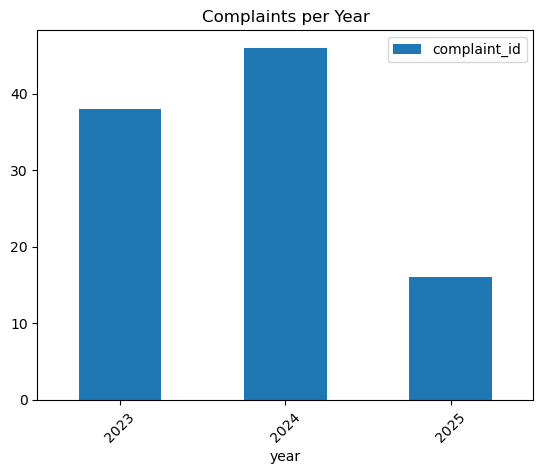

In [9]:
#complaints per year in bar form.
pd.DataFrame(complaints_per_year).plot(kind='bar', title='Complaints per Year', rot=45)

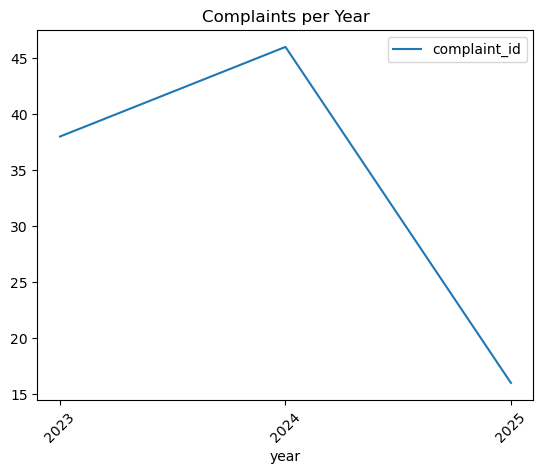

In [10]:
# Complaints per year in line form.
pd.DataFrame(complaints_per_year).plot(title='Complaints per Year', rot=45).set_xticks(complaints_per_year.index)

In [11]:
# Complaints per month.
complaints_per_month = data.groupby('month')['complaint_id'].count()
complaints_per_month.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
complaints_per_month

Jan     8
Feb    12
Mar     3
Apr     7
May     8
Jun     9
Jul    11
Aug    13
Sep    12
Oct     3
Nov     7
Dec     7
Name: complaint_id, dtype: int64

<AxesSubplot:>

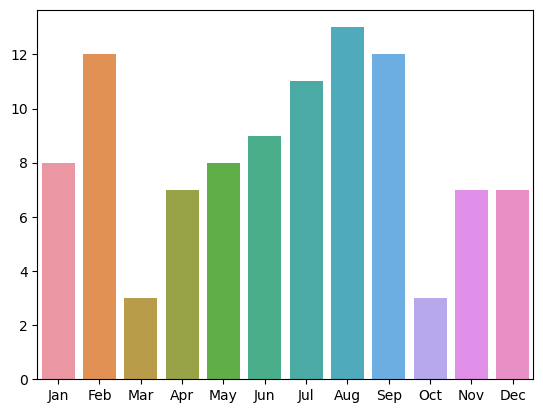

In [12]:
# Complaints per month in bar form.
sns.barplot(x=complaints_per_month.index, y=complaints_per_month.values)


<AxesSubplot:>

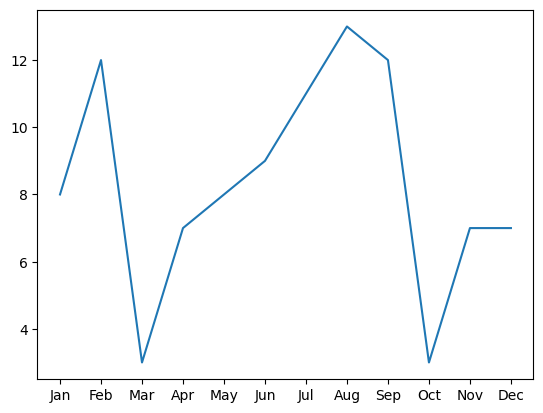

In [13]:
# complaints per month in line form.
sns.lineplot(x=complaints_per_month.index, y=complaints_per_month.values)


In [24]:
# Complaint per day of the week.
complaints_per_day_of_week = data.groupby('day_of_week')['complaint_id'].count()
complaints_per_day_of_week.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
complaints_per_day_of_week

Mon    13
Tue    18
Wed    21
Thu    13
Fri    12
Sat    15
Sun     8
Name: complaint_id, dtype: int64

<AxesSubplot:>

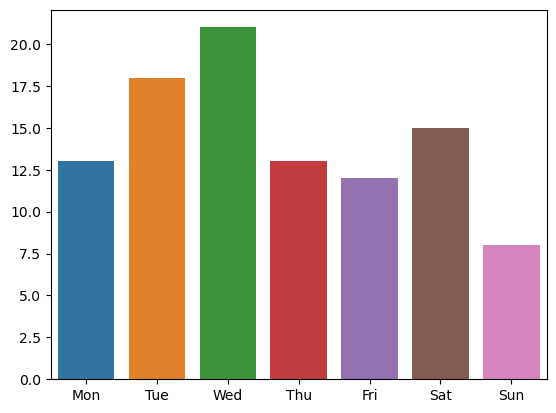

In [23]:
#  Complaints per day of week in bar form.
sns.barplot(x=complaints_per_day_of_week.index, 
            y=complaints_per_day_of_week.values,
            )

<AxesSubplot:>

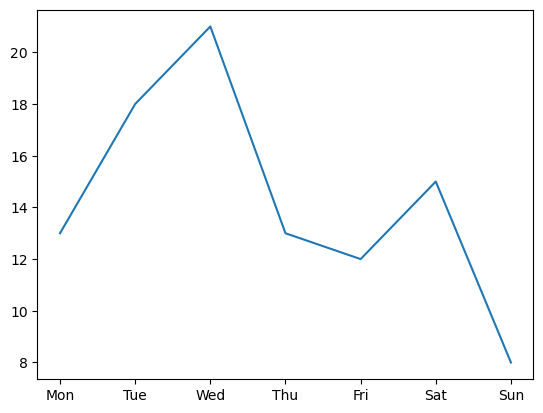

In [25]:
#  Complaints per day of week in line form.
sns.lineplot(x=complaints_per_day_of_week.index, 
             y=complaints_per_day_of_week.values,
             )

In [38]:
#  Number of complaints per precinct.
complaints_per_precinct = data.groupby('precinct')['complaint_id'].count()
complaints_per_precinct

precinct
Central    20
East       20
North      18
South      21
West       21
Name: complaint_id, dtype: int64

Text(0, 0.5, '')

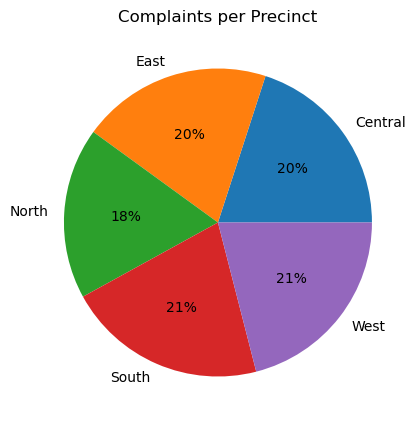

In [54]:
# Number of complaints per precinct in pie chart form.
complaints_per_precinct.plot.pie(title='Complaints per Precinct',
                                autopct='%.0f%%',
                                figsize=(5, 5), 
                                legend=False,
                                
                                ).set_ylabel('')

In [51]:
complaints_per_precinct

precinct
Central    20
East       20
North      18
South      21
West       21
Name: complaint_id, dtype: int64

In [42]:
#  Number of complaints per type of complaint.
complaints_per_type = data.groupby('complaint_type')['complaint_id'].count()
complaints_per_type

complaint_type
Excessive Force     28
Neglect of Duty     21
Racial Profiling    31
Verbal Abuse        20
Name: complaint_id, dtype: int64

Text(0, 0.5, '')

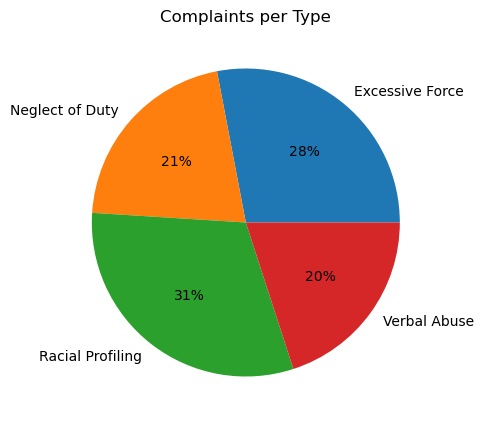

In [61]:
# Number of complaints per type of complaint in pie chart form.
complaints_per_type.plot.pie(title='Complaints per Type',
                                autopct='%.0f%%',
                                figsize=(5, 5), 
                                legend=False,
                                
                                ).set_ylabel('')

In [77]:
# show resolutions per complaints type.
resolutions_per_type = data.groupby('complaint_type')['resolution'].value_counts()
resolutions_per_type

complaint_type    resolution
Excessive Force   Unfounded      8
                  Exonerated     7
                  Sustained      7
                  Pending        6
Neglect of Duty   Exonerated     9
                  Sustained      7
                  Unfounded      3
                  Pending        2
Racial Profiling  Pending       11
                  Sustained      8
                  Exonerated     6
                  Unfounded      6
Verbal Abuse      Unfounded      8
                  Exonerated     5
                  Pending        5
                  Sustained      2
Name: resolution, dtype: int64

In [85]:
# Show complaintants race by preinct.
complainants_per_precinct = data.groupby('precinct')['complainant_race'].value_counts()
complainants_per_precinct

precinct  complainant_race
Central   Asian               7
          Black               5
          Other               4
          White               3
          Hispanic            1
East      Hispanic            6
          Black               5
          Other               5
          Asian               3
          White               1
North     White               8
          Asian               3
          Black               3
          Hispanic            3
          Other               1
South     Asian               6
          Hispanic            4
          Other               4
          White               4
          Black               3
West      Asian               6
          White               6
          Other               4
          Black               3
          Hispanic            2
Name: complainant_race, dtype: int64

In [146]:
precincts = data['precinct'].value_counts().keys().sort_values()
for p in precincts:
    print(p)

Central
East
North
South
West


In [158]:
data[data['precinct'] == precincts[0]]['complaint_type'].value_counts().values

array([7, 5, 5, 3], dtype=int64)

In [159]:
precincts = data['precinct'].value_counts().keys().sort_values()
precincts

Index(['Central', 'East', 'North', 'South', 'West'], dtype='object')

In [160]:
precinct_count = data[data['precinct'] == precincts[0]]['complaint_type'].value_counts().count()
precinct_count

4

In [164]:
complaint_types = data['complaint_type'].value_counts().keys()
complaint_types

Index(['Racial Profiling', 'Excessive Force', 'Neglect of Duty',
       'Verbal Abuse'],
      dtype='object')

In [ ]:
for p,c in zip(precincts, complaint_types):
    print(p)
    print(c)
    complaint = data[data['precinct'] == p]
    complaint = data[data['complaint_type'] == c].head()['complaint_id'].count()
    print(complaint)
        

Central
5
5
5
5
East
5
5
5
5
North
5
5
5
5
South
5
5
5
5
West
5
5
5
5


In [182]:
data[data['complaint_type'] == "Excessive Force"]['complaint_id'].count()
# data[data['complaint_type'] == c ]['complaint_id'].count()

28